In [1]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

t10 = torch.tensor(np.arange(1,101)).reshape((10,10)).to(torch.int8)
print("10x10 Tensor: ", t10)

10x10 Tensor:  tensor([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]], dtype=torch.int8)


In [2]:
t10T = t10.t()
print("Transposed Tensor: ", t10T)
print(id(t10.storage()))
print(id(t10T.storage()))
print(id(t10.storage()) == id(t10T.storage())) 

Transposed Tensor:  tensor([[  1,  11,  21,  31,  41,  51,  61,  71,  81,  91],
        [  2,  12,  22,  32,  42,  52,  62,  72,  82,  92],
        [  3,  13,  23,  33,  43,  53,  63,  73,  83,  93],
        [  4,  14,  24,  34,  44,  54,  64,  74,  84,  94],
        [  5,  15,  25,  35,  45,  55,  65,  75,  85,  95],
        [  6,  16,  26,  36,  46,  56,  66,  76,  86,  96],
        [  7,  17,  27,  37,  47,  57,  67,  77,  87,  97],
        [  8,  18,  28,  38,  48,  58,  68,  78,  88,  98],
        [  9,  19,  29,  39,  49,  59,  69,  79,  89,  99],
        [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]], dtype=torch.int8)
2697358544128
2697358541824
False


C:\Users\Maja\AppData\Local\Temp\ipykernel_15268\2302876131.py:3: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(id(t10.storage()))
C:\Users\Maja\AppData\Local\Temp\ipykernel_15268\2302876131.py:4: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(id(t10T.storage()))
C:\Users\Maja\AppData\Local\Temp\ipykernel_15268\2302876131.py:5: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

In [3]:
t9 = t10[1:,1:]
print("Submatrix: ", t9)

print("Stride of Submatrix: ", t9.stride())
print("Size of Submatrix: ", t9.size())
print("Offset of Submatrix: ", t9.storage_offset()) #print

Submatrix:  tensor([[ 12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 92,  93,  94,  95,  96,  97,  98,  99, 100]], dtype=torch.int8)
Stride of Submatrix:  (10, 1)
Size of Submatrix:  torch.Size([9, 9])
Offset of Submatrix:  11


In [4]:
tRand = torch.randint(low=1, high=99, size=[10,10], dtype=torch.float)
tInv = torch.inverse(tRand)
print("Inverse Matrix:", tInv)
tUnity = torch.round((tRand @ tInv), decimals=3)
mUnity = np.array(tUnity)
print(mUnity == np.eye(10))

Inverse Matrix: tensor([[-5.0811e-03, -8.6346e-03, -4.6512e-03,  5.2805e-03,  2.8723e-03,
         -8.1341e-03,  8.6395e-03, -5.8710e-03,  1.7160e-02, -2.3705e-03],
        [-1.2455e-02, -1.3236e-03, -1.7764e-03,  4.5583e-03,  1.4000e-03,
         -5.0634e-03,  1.3952e-03,  1.4143e-03,  9.5566e-03,  2.8317e-03],
        [-8.2095e-03,  6.2068e-03,  6.6815e-03,  7.1783e-03, -1.0949e-02,
         -6.1174e-03,  8.8931e-03,  8.2810e-03,  4.5187e-03, -8.8621e-03],
        [ 4.6041e-03, -2.2615e-03, -4.7168e-03,  1.4123e-03,  3.6297e-03,
          8.5453e-03, -3.2468e-03,  1.6386e-03,  4.1720e-03, -1.3077e-02],
        [ 1.6980e-02,  1.1170e-02, -2.5725e-03, -1.3397e-02,  8.6443e-03,
          8.0990e-03, -1.6015e-02,  1.1735e-04, -1.2467e-02, -3.5316e-03],
        [ 1.2882e-03, -6.1099e-03,  1.6741e-02, -2.1107e-03,  6.8614e-04,
          3.3223e-03,  1.4737e-03, -8.2068e-04, -1.2774e-02,  6.5247e-03],
        [-2.9177e-03,  1.2779e-02, -1.2564e-02,  8.7221e-03, -2.1412e-03,
          3.2372

torch.Size([100, 100, 3])
(260, 1, 50440)


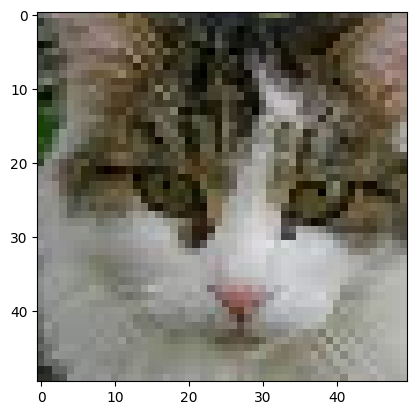

In [5]:
img = Image.open("Katze.jpg")
preprocess = transforms.ToTensor()
imgP = preprocess(img).permute(1,2,0)
imgCrop = imgP[30:130,50:150,:]

print(imgCrop.shape)
print(imgP.stride())
img_strided = torch.as_strided(imgCrop, size=(50, 50, 3), stride=(520, 2, 50440))

plt.imshow(img_strided)